In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

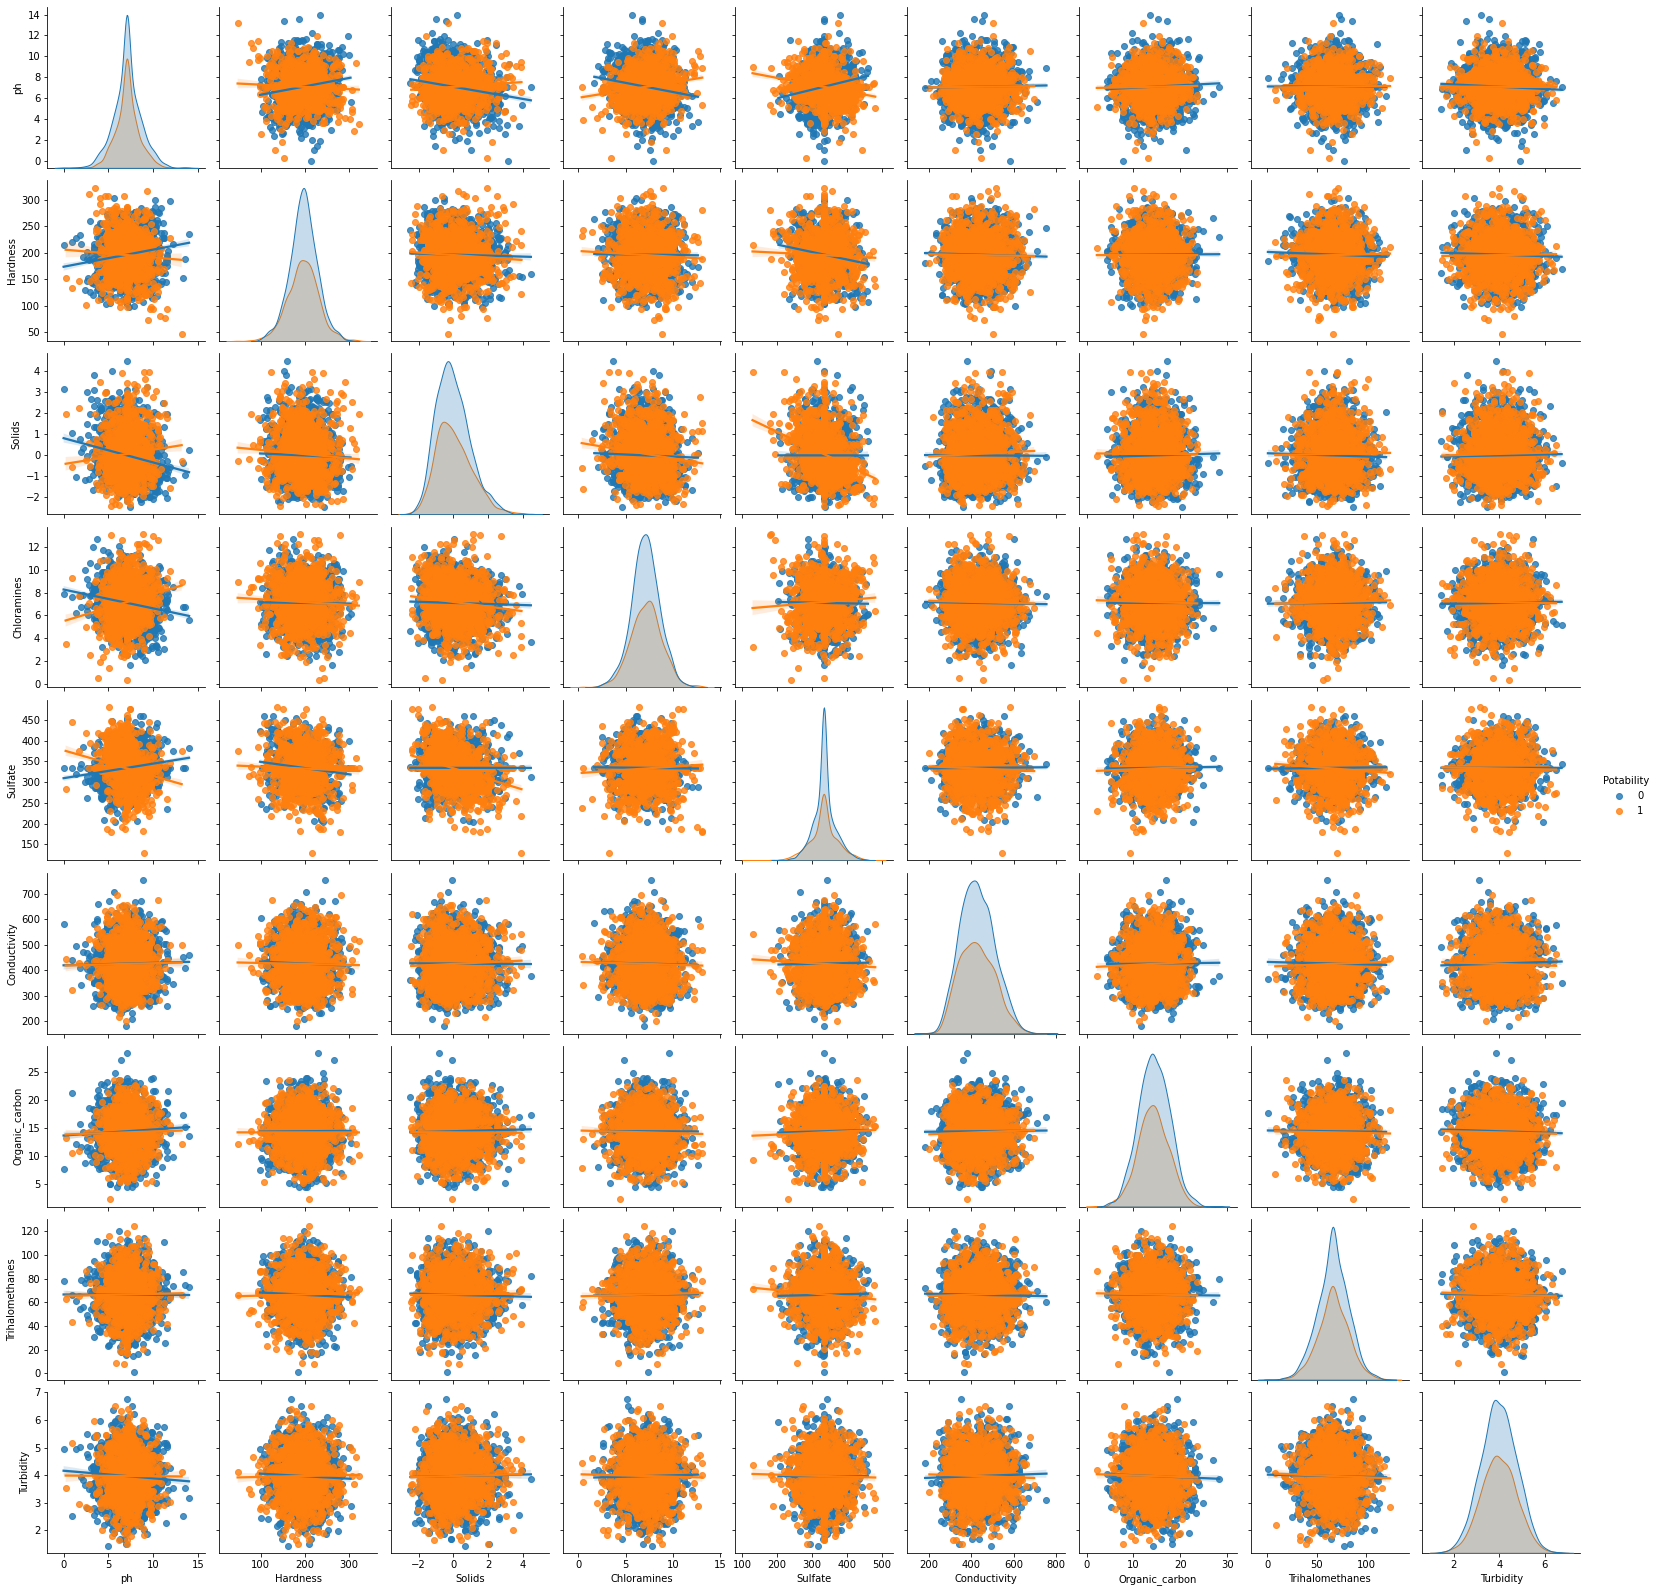

In [20]:
sns.pairplot(df, hue='Potability', kind='reg')

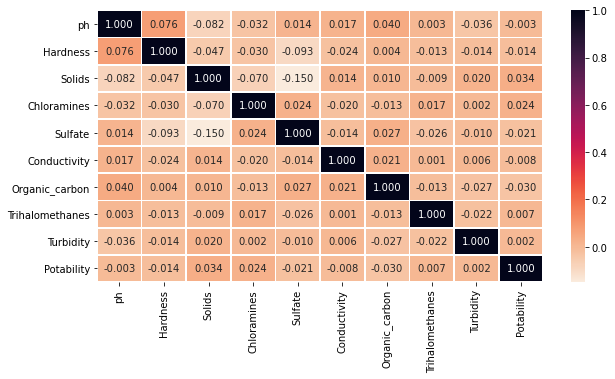

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="rocket_r",fmt='.3f',linewidths=.8)

In [9]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

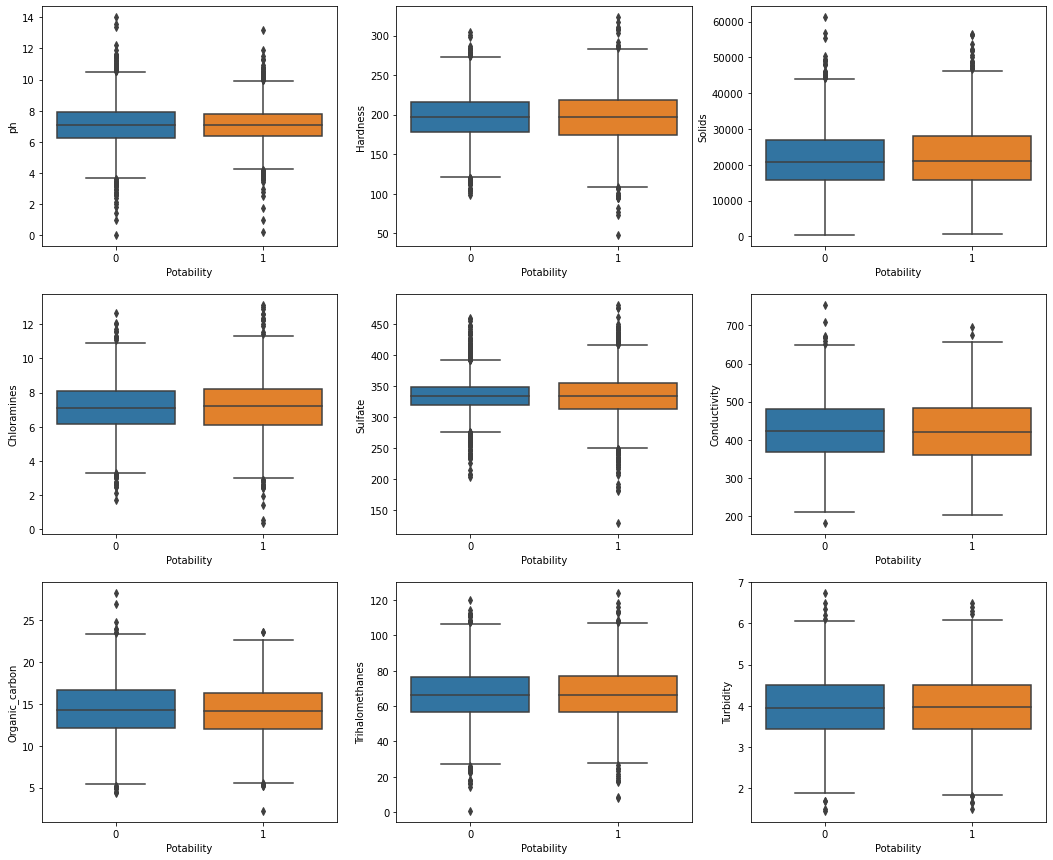

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.boxplot(x="Potability",y="ph",ax=axes[0,0],data=df)
sns.boxplot(x="Potability",y="Hardness",ax=axes[0,1],data=df)
sns.boxplot(x="Potability",y="Solids",ax=axes[0,2],data=df)
sns.boxplot(x="Potability",y="Chloramines",ax=axes[1,0],data=df)
sns.boxplot(x="Potability",y="Sulfate",ax=axes[1,1],data=df)
sns.boxplot(x="Potability",y="Conductivity",ax=axes[1,2],data=df)
sns.boxplot(x="Potability",y="Organic_carbon",ax=axes[2,0],data=df)
sns.boxplot(x="Potability",y="Trihalomethanes",ax=axes[2,1],data=df)
sns.boxplot(x="Potability",y="Turbidity",ax=axes[2,2],data=df)

In [11]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [12]:
### Feature Importance

#from sklearn.ensemble import ExtraTreesRegressor
#import matplotlib.pyplot as plt
#model = ExtraTreesRegressor()
#model.fit(X,y)

In [13]:
#print(model.feature_importances_)

In [14]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(5).plot(kind='barh')
#plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
feature_scale = ['Solids']
feature_scale

['Solids']

In [16]:
df[feature_scale] = sts.fit_transform(df[feature_scale])

In [17]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,-0.139471,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,-0.385987,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,-0.240047,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,0.000493,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,-0.460249,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,2.916188,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,-0.534295,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,1.270810,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,-1.144058,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
y=df["Potability"]
X=df.drop(["Potability"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42).fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.688708036622584

## Confusion Matrix